# AG2 (formerly Autogen) Multi-Agents Example on Vertex AI Agent Engine

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fagent-engine%2Ftutorial_ag2_on_agent_engine.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/agent-engine/tutorial_ag2_on_agent_engine.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>


<br>
<br>
<br>
<br>

| | |
|-|-|
| Author(s) | [Emmanuel Awa](https://github.com/awaemmanuel)|
| Reviewer(s) | Turan Bulmus, [Rajesh Thallam](https://github.com/rthallam), Polong Lin|
| Last updated | 2025 03 16: Update to latest Agent Engine SDK |
| | 2025 02 20: Update to latest AG2 SDK and report summarization using LLM |
| | 2025 01 16: Updated from `autogen[gemini]` to `ag2`  |
| | 2024 12 20: Review |
| | 2024 12 19: Initial Publication|

This notebook showcases how to deploy [AG2](https://ag2.ai/) on Vertex AI through [Agent Engine API](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/reasoning-engine). AG2 (formerly AutoGen) is an open-source framework for building AI agents that can collaborate to solve tasks. It simplifies agent development, supports LLMs and tools, and enables various workflows, making it suitable for building multiagent applications on Vertex AI.

## Prerequisites
In other to run this notebook, you will need to set up your Google Cloud project and enable the Vertex AI API.   

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager).
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable Logs Explorer](https://console.cloud.google.com/logs/query;query=resource.type%3D%22aiplatform.googleapis.com%2FReasoningEngine%22)

## Step 1: Environment Setup: Google Cloud and AG2

###  Authentication  

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud).

In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [2]:
# @title Authenticate - Google Colab Only
import sys
from google.colab import auth

if "google.colab.auth" in sys.modules:
    auth.authenticate_user()
    print("Authenticated")

Authenticated


###  Install Dependencies and Import Packages

In [ ]:
# @title Install/Upgrade Vertex AI SDK - Restart Runtime (If needed)
def install_or_upgrade_vertex_ai():
    package_name = "google-cloud-aiplatform"
    minimum_version = "1.83.0"

    try:
        import google.cloud.aiplatform as aiplatform

        installed_version = aiplatform.__version__

        if installed_version < minimum_version:
            print(
                f"Upgrading {package_name} from version {installed_version} to {minimum_version}..."
            )
            %pip install google-cloud-aiplatform --upgrade --quiet --user
            print(f"Successfully upgraded {package_name}.")
        else:
            print(
                f"{package_name} is already installed with version {installed_version}."
            )
    except ImportError:
        print(
            f"{package_name} is not installed. Installing version {minimum_version}..."
        )
        %pip install google-cloud-aiplatform --upgrade --quiet --user
        print(f"Successfully installed {package_name}.")


install_or_upgrade_vertex_ai()

google-cloud-aiplatform is already installed with version 1.84.0.


In [ ]:
# @title Install AG2/Dependencies
%pip install ag2[gemini]==0.7.3 dask[dataframe]==2024.10.0 --quiet > /dev/null 2>&1
%pip install --upgrade google-cloud-aiplatform[agent_engines,ag2] --quiet > /dev/null 2>&1
%pip show ag2 google-cloud-aiplatform

Name: ag2
Version: 0.7.3
Summary: Alias package for pyautogen
Home-page: https://github.com/ag2ai/ag2
Author: Chi Wang & Qingyun Wu
Author-email: support@ag2.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: pyautogen
Required-by: 
---
Name: google-cloud-aiplatform
Version: 1.85.0
Summary: Vertex AI API client library
Home-page: https://github.com/googleapis/python-aiplatform
Author: Google LLC
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: docstring-parser, google-api-core, google-auth, google-cloud-bigquery, google-cloud-resource-manager, google-cloud-storage, packaging, proto-plus, protobuf, pydantic, shapely, typing-extensions
Required-by: 


In [5]:
# @title Import relevant packages
import pprint
from IPython.display import Markdown

import vertexai
from vertexai import agent_engines
from vertexai.agent_engines import AgentEngine, Queryable

from autogen import AssistantAgent, UserProxyAgent, GroupChat, GroupChatManager
from autogen.cache import Cache
from autogen.code_utils import content_str

print(f"Required libraries successfully imported.")

Required libraries successfully imported.



Next, we need to first install AG2 with Gemini features.

### Configuration Parameters

Before proceeding, you need to define the following parameters:

1.  **`MODEL`**: Specifies the Gemini model to utilize for the multi-agent conversation. Choose from available Gemini model options outlined [here](https://ai.google.dev/gemini-api/docs/models/gemini).
2.  **`PROJECT_ID`**: Identifies the Google Cloud project where the executions will occur.
3.  **`STAGING_BUCKET`**: Designates a Google Cloud Storage bucket that you own and have write access to. This bucket will be used for temporary storage during the execution process. Bucket name must begin with `gs://`
4.  **`CACHING_SEED`**:  Provides an integer value for best-effort deterministic sampling. Note that determinism is not guaranteed.
5.  **`LOCATION`**:  Indicates the Google Cloud region for the deployment. Currently, Agent Engine is only supported in `us-central1`.

These parameters will be employed to configure the `AG2` framework and set up the remote deployment environment for the Agent Engine.

In [6]:
# @title Set Configuration Parameters
MODEL_NAME = "gemini-2.0-flash-001"  # @param {'type': 'string'}
PROJECT_ID = "<YOUR_PROJECT_ID>"  # @param {'type': 'string'}
STAGING_BUCKET = "gs://<YOUR_GCS_BUCKET>"  # @param {'type': 'string'}
CACHING_SEED = 42  # @param {'type': 'integer'}
LOCATION = "us-central1"

STAGING_BUCKET = (
    STAGING_BUCKET if STAGING_BUCKET.startswith("gs://") else f"gs://{STAGING_BUCKET}"
)

config_list = [
    {
        "model": MODEL_NAME,
        "project_id": PROJECT_ID,
        "location": LOCATION,
        "api_type": "google",
    }
]
seed = CACHING_SEED
all_config = {
    "gemini_config_list": config_list,
    "caching_seed": seed,
    "staging_bucket": STAGING_BUCKET,
}
print("Configuration:")
pprint.pprint(all_config)

Configuration:
{'caching_seed': 42,
 'gemini_config_list': [{'api_type': 'google',
                         'location': 'us-central1',
                         'model': 'gemini-2.0-flash-001',
                         'project_id': 'emmanuel-genai-sa'}],
 'staging_bucket': 'gs://test_autogen'}


In [8]:
# @title Initialize Vertex AI
vertexai.init(project=PROJECT_ID, location=LOCATION, staging_bucket=STAGING_BUCKET)
print(f"Vertex AI successfully initialized")

Vertex AI successfully initialized


## Step 2: An AG2 Example of Multi-Agent Conversations

AG2 supports multi-agent collaboration through a conversational pattern called **group chat**. This general pattern shares characteristics with known multi-agent patterns like **Router Agent (one-by-one)**, where a central agent delegates tasks sequentially, and **Dynamic (all-to-all)**, where agents communicate freely.

However, AG2's `GroupChat` offers a distinct approach. A `GroupChatManager` orchestrates the conversation by selecting a speaker, broadcasting their message, and repeating the process. While not strictly sequential like a Router, the manager guides the flow depending on the strategy the user chooses.

Unlike a purely Dynamic system, the manager provides a degree of control, preventing chaotic interactions. Agent selection strategies include: `round_robin`, `random`, `manual`, and the default `auto` (based on the manager's llm configuration). We have choosen the `auto` mode to allow Gemini's reasoning ability decide who the next speaker should be.

This example showcases a research-focused group chat with five agents:

*   **Researcher:** Conducts research and identifies key information.
*   **Data Analyst:** Analyzes data and extracts insights.
*   **Literature Reviewer:** Synthesizes research into a literature review.
*   **Fact Checker:** Verifies information accuracy.
*   **User Proxy:** Represents the user, initiates the conversation, and can execute code.

These agents reside in a `GroupChat` orchestrated by a `GroupChatManager` using the `auto` strategy. The `User_proxy` initiates the collaborative research workflow.

The diagram below shows the `GroupChatManager` workflow.

> **NOTE:** If the image is not legible, please right click and view in new tab



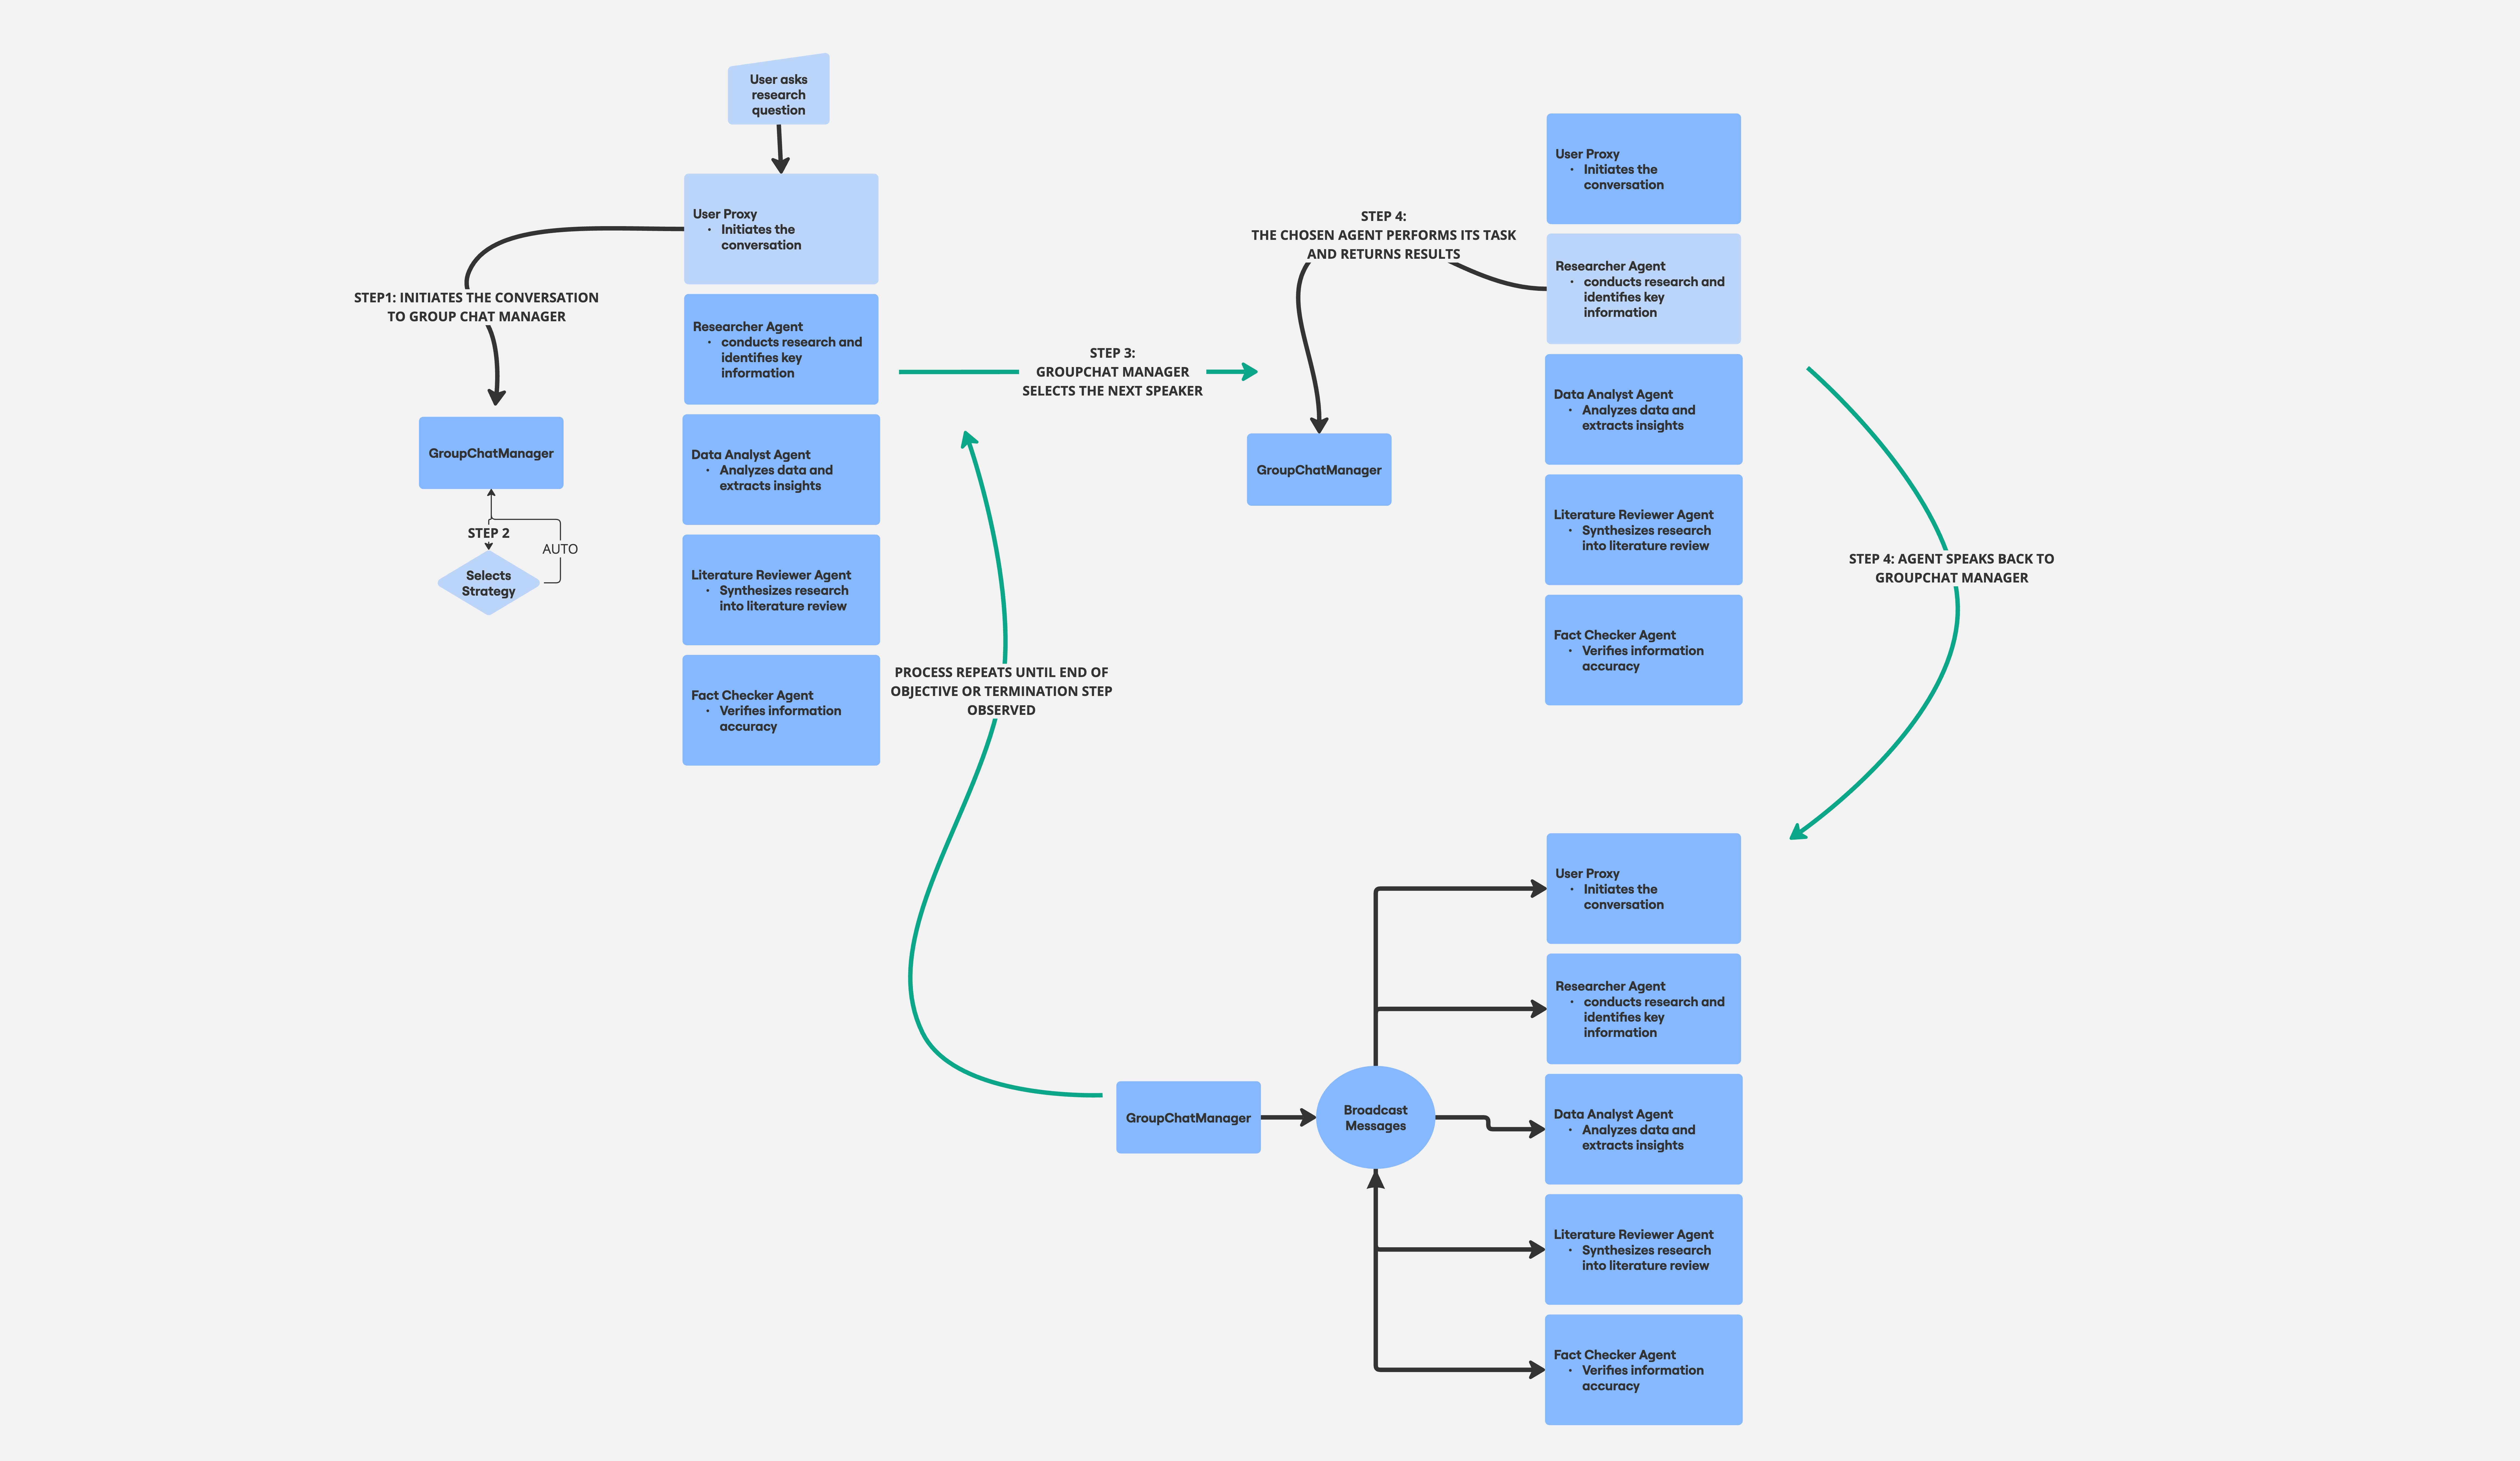



**Defining the Research Topic**

This section allows you to specify the topic of interest for the multi-agent research team. By default, the agents will focus on "Large Language Models." However, you can customize the research topic by modifying the `topic` below:


In [10]:
research_topic = "Large Language Models"  # @param ["Large Language Models", "Real Estate", "Agentic Workflows"]

The specialized agents (researcher, fact-checker, data analysts and literature reviewer) utilize this topic as their primary focus for information gathering and analysis.  By defining a clear research topic, you ensure that the multi-agent conversation remains relevant and productive.

In [12]:
# @title Define Agents

# Define the Researcher agent. This agent conducts thorough research on the given topic,
# identifying key trends, publications, experts, and relevant data sources.
researcher = AssistantAgent(
    name="Researcher",
    llm_config={"config_list": config_list, "seed": seed},
    description="Conducts thorough research on the given topic.",
    system_message=f"""You are a meticulous researcher. Your goal is to conduct thorough research, identifying key trends, publications, experts, and relevant data sources. You should provide accurate and well-cited information.""",
)

# Define the Literature Reviewer agent. This agent synthesizes research findings into a
# coherent and well-structured literature review, identifying key themes, connections, and gaps in the existing research.
literature_reviewer = AssistantAgent(
    name="Literature_Reviewer",
    llm_config={"config_list": config_list, "seed": seed},
    description="Synthesizes research findings into a coherent literature review.",
    system_message=f"""You are a skilled literature reviewer. Your goal is to synthesize the provided research findings into a coherent and well-structured literature review. You should identify key themes, connections, and gaps in the existing research.""",
)

# Define the Fact Checker agent. This agent verifies the accuracy and validity of information,
# checking sources, identifying potential biases, and ensuring consistency with established knowledge.
fact_checker = AssistantAgent(
    name="Fact_Checker",
    llm_config={"config_list": config_list, "seed": seed},
    description="Verifies the accuracy and validity of information.",
    system_message="""You are a meticulous fact-checker. Your goal is to verify the accuracy and validity of any information presented to you. You should check sources, identify potential biases, and ensure the information is consistent with established knowledge.""",
)

# Define the Data Analyst agent. This agent analyzes data related to the research topic and
# extracts meaningful insights, identifying trends, patterns, and correlations.
data_analyst = AssistantAgent(
    name="Data_Analyst",
    llm_config={"config_list": config_list, "seed": seed},
    description="Analyzes data and extracts meaningful insights.",
    system_message=f"""You are a skilled data analyst. Your goal is to analyze data and extract meaningful insights. You should identify trends, patterns, and correlations in the data and present your findings in a clear and concise manner.""",
)

# Define the User Proxy agent. This agent represents the user and can run code to facilitate tasks.
user_proxy = UserProxyAgent(
    name="User_proxy",
    code_execution_config={
        "last_n_messages": 20,
        "work_dir": "coding",
        "use_docker": False,
    },
    human_input_mode="TERMINATE",
    is_termination_msg=lambda x: content_str(x.get("content")).find("TERMINATE") >= 0,
    description="I represent the user, and can run code.",
)

# Create the GroupChat, a conversable pattern, that facilitates the collaboration on tasks requiring interaction among multiple agents.
# All agents contribute to a single conversation thread and share the same context. We have set the max turns of conversation to 12
groupchat = GroupChat(
    agents=[user_proxy, researcher, literature_reviewer, fact_checker, data_analyst],
    messages=[],
    max_round=12,
)

# Create the GroupChatManager, a specialized agent, to orchestrate the group chat. A GroupChatManager selects an agent to speak,
# broadcasts the message to all other agents, and repeats this process until the conversation stops or maximum number of turns is reached.
# The default selection strategy is "auto", where the manager's LLM, in our case Gemini, chooses the next speaker.
manager = GroupChatManager(
    groupchat=groupchat,
    llm_config={"config_list": config_list, "seed": seed},
    is_termination_msg=lambda x: content_str(x.get("content")).find("TERMINATE") >= 0,
)

In [ ]:
# @title Start Multi-agent Conversations
msg = f"""Conduct research on the latest advancements in {research_topic}, analyze relevant data, and produce a comprehensive literature review with verified facts."""
custom_summary_prompt = f"Generate a final report on {research_topic} from the chat history. Just start the report immediately without adding any additional commentary before or after the report."
with Cache.disk() as cache:  # enable caching to reduce inference cost
    result = user_proxy.initiate_chat(
        manager,
        message=msg,
        summary_method="reflection_with_llm",
        summary_args={"summary_prompt": custom_summary_prompt},
        cache=cache,
    )

In [ ]:
# @title Inspect Report Generated By Agents
summary = result.summary
final_report = content_str(
    summary.get("content") if isinstance(summary, dict) else summary
)
display(Markdown(final_report))

## Step 3. Deploy agents to Agent Engine

### Deploying The AG2 Multi-Agent Conversations Example On Vertex AI Agent Engine.

1. Create a class `ResearchApp`, that implements a agent engine `Queryable` class. This class will wrap the agents from cell above.

2. The syntax used to create a register a agent engine resource needs to implement `set_up` and `query` methods. Here is an example of a Agent Engine [advanced app configuration](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/reasoning-engine#deploy_an_advanced_app_configuration) that show this.


> **NOTE:** All agents and boostrapping code must be initialized in the `set_up` method and not the `__init__` method. Multi-agent conversation and user proxy code will go into the `query` method.



In [19]:
# @title Define AG2 Agents As a Agent Engine QueryAble
class ResearchApp(Queryable):
    """This class defines a research application using AG2. It facilitates multi-agent conversations for research tasks."""

    base_question = "Conduct research on the latest advancements in {topic}, analyze relevant data, and produce a comprehensive literature review with verified facts."
    custom_summary_prompt = f"Generate a final report on {research_topic} from the chat history. Just start the report immediately without adding any additional commentary before or after the report."

    def __init__(self, project_id: str, location: str):
        """
        Initializes the ResearchApp instance.

        Args:
            project_id (str): The project ID for AG2.
            location (str): The location of the AG2 instance.
        """
        self.project_id = project_id
        self.location = location
        self.set_up_complete = False

    def set_up(self):
        """Sets up the research agents and conversation environment."""
        self.researcher = AssistantAgent(
            name="Researcher",
            llm_config={
                "config_list": all_config["gemini_config_list"],
                "seed": all_config["caching_seed"],
            },
            description="Conducts thorough research on the given topic.",
            system_message="""You are a meticulous researcher. Your goal is to conduct thorough research, identifying key trends, publications, experts, and relevant data sources. You should provide accurate and well-cited information.""",
        )

        self.literature_reviewer = AssistantAgent(
            name="Literature_Reviewer",
            llm_config={
                "config_list": all_config["gemini_config_list"],
                "seed": all_config["caching_seed"],
            },
            description="Synthesizes research findings into a coherent literature review.",
            system_message="""You are a skilled literature reviewer. Your goal is to synthesize the provided research findings into a coherent and well-structured literature review. You should identify key themes, connections, and gaps in the existing research.""",
        )

        self.fact_checker = AssistantAgent(
            name="Fact_Checker",
            llm_config={
                "config_list": all_config["gemini_config_list"],
                "seed": all_config["caching_seed"],
            },
            description="Verifies the accuracy and validity of information.",
            system_message="""You are a meticulous fact-checker. Your goal is to verify the accuracy and validity of any information presented to you. You should check sources, identify potential biases, and ensure the information is consistent with established knowledge.""",
        )

        self.data_analyst = AssistantAgent(
            name="Data_Analyst",
            llm_config={
                "config_list": all_config["gemini_config_list"],
                "seed": all_config["caching_seed"],
            },
            description="Analyzes data and extracts meaningful insights.",
            system_message="""You are a skilled data analyst. Your goal is to analyze data and extract meaningful insights. You should identify trends, patterns, and correlations in the data and present your findings in a clear and concise manner.""",
        )

        self.user_proxy = UserProxyAgent(
            name="User_proxy",
            code_execution_config={
                "last_n_messages": 20,
                "work_dir": "coding",
                "use_docker": False,
            },
            human_input_mode="NEVER",
            is_termination_msg=lambda x: content_str(x.get("content")).find("TERMINATE")
            >= 0,
            description="I represent the user, and can run code.",
        )

        self.groupchat = GroupChat(
            agents=[
                self.user_proxy,
                self.researcher,
                self.literature_reviewer,
                self.fact_checker,
                self.data_analyst,
            ],
            messages=[],
            max_round=12,
        )
        self.manager = GroupChatManager(
            groupchat=self.groupchat,
            llm_config={"config_list": config_list, "seed": seed},
            is_termination_msg=lambda x: content_str(x.get("content")).find("TERMINATE")
            >= 0,
        )
        self.set_up_complete = True

    def query(self, topic: str = "Large Language Models"):
        """
        Queries the multi-agent research system.

        Args:
            topic (str): The research topic. Defaults to "Large Language Models".

        Returns:
            str: A summary of the research conducted by the multi-agent system.
        """
        if not self.set_up_complete:
            self.set_up()
        question = self.base_question.format(topic=topic)
        with Cache.disk() as cache:
            result = self.user_proxy.initiate_chat(
                self.manager,
                message=question,
                summary_method="reflection_with_llm",
                summary_args={"summary_prompt": custom_summary_prompt},
                cache=cache,
            )
        summary = result.summary
        return content_str(
            summary.get("content") if isinstance(summary, dict) else summary
        )


print(f"Research App with multi-agents created.")

Research App with multi-agents created.


### Test

This section demonstrates how to test the Agent Engine locally before deploying it to Vertex AI. By running the `ResearchApp` locally, you can observe a multi-agent conversation flow similar to the previous example. This local testing helps ensure that the agents and their interactions are functioning as expected before deploying to the cloud.

In [ ]:
# @title Testing - Local Development
local_engine = ResearchApp(project_id=PROJECT_ID, location=LOCATION)
local_engine.set_up()
report = local_engine.query(topic=research_topic)

In [ ]:
# @title Inspect Report
display(Markdown(report))

### Setup and Deploy to Vertex AI Agent Engine

This section guides you through deploying the AG2 multi-agent application to Vertex AI Agent Engine. Before proceeding with the deployment, we'll ensure there are no existing deployments to avoid conflicts. This involves listing and deleting any previous Agent Engine deployments to start with a clean slate. Subsequently, we'll utilize the `AgentEngine.create` method to deploy the application, specifying dependencies and configurations.

> **NOTE:** Please be patient as the deployment is a long running operation. Once successful, the cell will return the resource URI of deployment that can be used for subsequent executions.  
>**Example:**
> ` agent_engine = vertexai.agent_engines.get('projects/<YOUR_PROJECT_ID_NUMBER>/locations/us-central1/reasoningEngines/<DEPLOYED_AGENT_ENGINE_ID>')`


In [23]:
# @title Clean up deployment if needed
def cleanup_deployments(dry_run: bool = True):
    agent_engine_list = agent_engines.AgentEngine.list()
    if agent_engine_list:
        print(f"Found {len(agent_engine_list)} existing deployments:")
        for re in agent_engine_list:
            print(f"Deleting {re.display_name}")
            print(f"Resource URI: {re.resource_name}")
            if not dry_run:
                re.delete()
            else:
                print("Set dry_run=False to perform the deletion.")
                print("IMPORTANT: Make sure you own all deployments before deleting.")
    else:
        print("No deployments found.")


dry_run_delete_step = True  # @param {type:"boolean"}
cleanup_deployments(dry_run_delete_step)

No deployments found.


Now, we'll deploy the multi-agent application to Vertex AI Agent Engine. This process might take a few minutes as it involves setting up the necessary infrastructure for remote execution.


In [24]:
# @title Define GCS bucket directory to stage the deployment artifacts
artifacts_gcs_dirname = "ag2_research_app"  # @param {'type': 'string'}

In [ ]:
# @title Deploy to Agent Engine - Please Wait
agent_engine = AgentEngine.create(
    ResearchApp(project_id=PROJECT_ID, location=LOCATION),
    display_name="AG2 Research Application",
    gcs_dir_name=artifacts_gcs_dirname,
    description="AG2 example deployed on Vertex AI Agent Engine",
    requirements=[
        "ag2[gemini]==0.7.3",
        "google-cloud-aiplatform[agent_engines,ag2]==1.83.0",
        "google-generativeai==0.8.4",
        "dask[dataframe]==2024.10.0",
        "cloudpickle==3",
    ],
    extra_packages=[],
)

### Monitoring Deployment Progress with Google Cloud Logs Explorer

You can track the progress of your deployment by examining the logs in the Google Cloud Logs Explorer - [Click Here!](https://console.cloud.google.com/logs/query;query=resource.type%3D%22aiplatform.googleapis.com%2FReasoningEngine%22). A successfully progressing deployment will typically exhibit log entries indicating the initialization of agents, the exchange of messages between agents, and the completion of various stages in the research process.

**Here's what to look for in the logs:**

* **Agent initialization messages:** Logs confirming that each agent (Researcher, Literature Reviewer, etc.) has been successfully initialized.
* **Conversation logs:** Entries showing the back-and-forth communication between agents as they collaborate on the research task.
* **Progress indicators:** Messages signaling the completion of key steps, such as data analysis, fact-checking, and literature review generation.
* **Absence of error messages:** A lack of error or warning messages suggests that the deployment is proceeding without issues.


Monitoring deployment progress through the deployment logs [here](https://console.cloud.google.com/logs/query;query=resource.type%3D%22aiplatform.googleapis.com%2FReasoningEngine%22) provides valuable insights into the health and functionality of your multi-agent application.

### Testing the Deployed Multi-Agent Application

Now that the multi-agent application is deployed to Vertex AI Agent Engines, we can test its functionality. We expect the interaction flow and results to be consistent with the local testing performed earlier. This ensures that the deployed application behaves as intended and provides the same user experience.

In [ ]:
result = agent_engine.query(topic=research_topic)
display(Markdown(result))

### Writing Report To Disk (Optional)

The comprehensive literature review generated by the multi-agent conversation can be saved to a file. This allows for easy access, review, and potential modifications by users or other stakeholders.

**Here's how you can persist the report to disk:**

In [27]:
with open("report.md", "w") as f:
    f.write(str(result))

## Step 4: Clean up


To avoid incurring unnecessary costs, we can now safely remove the deployed Agent Engines.

In [28]:
agent_engine.delete()

## Conclusion

This notebook demonstrated how to build and deploy a multi-agent AI system on Vertex AI using AG2 (formerly AutoGen) and its Agent Engines. We showcased a collaborative workflow where specialized agents worked together to perform complex research and analysis.

### Agent Roles and Responsibilities

The system comprises the following agents, each with a distinct role:

*   **Researcher:** Conducts in-depth research on the given topic, identifying key trends, publications, experts, and relevant data sources. The Researcher provides accurate and well-cited information as the foundation for subsequent analysis.

*   **Literature Reviewer:** Synthesizes the Researcher's findings into a coherent and structured literature review. This agent identifies key themes, connections, and gaps in the existing research to provide a comprehensive overview of the current state of knowledge.

*   **Fact Checker:** Verifies the accuracy and validity of information presented by other agents, particularly the Researcher and Literature Reviewer. The Fact Checker meticulously checks sources, identifies potential biases, and ensures consistency with established knowledge.

*   **Data Analyst:** Analyzes data related to the research topic, extracting meaningful insights, identifying trends, patterns, and correlations. The Data Analyst provides quantitative support for the research with clear and concise presentations of findings.

*   **User Proxy:** Represents the user, initiating the conversation with the initial prompt or task. This agent can also execute code to support other agents, acting as an interface between the user and the multi-agent system. It also uses Gemini to reflect and create a final report using a custom prompt.

The `GroupChatManager` orchestrates the interaction between these agents. It selects an agent to contribute, broadcasts the message to all other agents, and repeats this process until the conversation concludes. The default "auto" selection strategy utilizes the manager's LLM to intelligently choose the next speaker based on the conversation's context. This collaborative approach enables more comprehensive and robust analyses than a single agent could achieve.

### Key Takeaways

*   **Collaborative Multi-Agent Workflow:** Demonstrated a workflow where distinct agents (Researcher, Data Analyst, Literature Reviewer, Fact Checker, and User Proxy) collaborate to conduct research, analyze data, synthesize findings, and ensure accuracy.
*   **Vertex AI Deployment:** Showcased the deployment and execution of this multi-agent system on Vertex AI's Agent Engine, providing scalable and efficient cloud-based execution.
*   **Simplified Agent Development with AG2:** Highlighted AG2's framework for building and managing AI agents, streamlining development and facilitating complex agent interactions.

This example provides a foundation for building and deploying custom multi-agent applications on Vertex AI, leveraging the power of AG2 for collaborative AI solutions.
